(173, 100, 100, 3)
(186, 100, 100, 3)
(165, 100, 100, 3)
(170, 100, 100, 3)


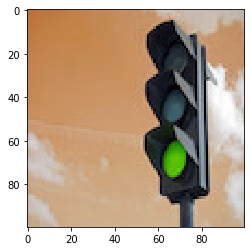

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'Images/green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'Images/red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'Images/red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'Images/green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

In [23]:
import numpy as np
def same_shuffle(arr1,arr2):
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [24]:
greenlist = list(greendata)
redlist = list(reddata)
# greencarlist = list(greencardata)
# redcarlist = list(redcardata)
datalist = greenlist+redlist
data = np.array(datalist)
y_green = list(np.zeros(186))
y_red = list(np.zeros(173)+1)
y = np.array(y_green + y_red)
data, y = same_shuffle(data, y)
data_test = data[290:]
data = data[:290]
y_test = y[290:]
y = y[:290]
print(data_test.shape)
print(data.shape)

359
(69, 100, 100, 3)
(290, 100, 100, 3)


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [26]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 16)        4624      
_________________________________________________________________
flatten_3 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7056)             

In [27]:
history = model.fit(data, y, epochs=100,validation_data=(data_test,y_test))

Train on 290 samples, validate on 69 samples
Epoch 1/100


Exception ignored in: <function Comm.__del__ at 0x107944ea0>
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('28e3a5f08c624e58bfa049b52c415cc3',)
Exception ignored in: <function Comm.__del__ at 0x107944ea0>
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "//anaconda3/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    co

290/290 [==============================] - 3s 9ms/sample - loss: 3.3715 - accuracy: 0.5103 - val_loss: 0.6932 - val_accuracy: 0.4928
Epoch 2/100
290/290 [==============================] - 2s 7ms/sample - loss: 0.7792 - accuracy: 0.4621 - val_loss: 0.6938 - val_accuracy: 0.4928
Epoch 3/100
290/290 [==============================] - 2s 7ms/sample - loss: 0.6908 - accuracy: 0.4897 - val_loss: 0.6932 - val_accuracy: 0.4928
Epoch 4/100
290/290 [==============================] - 2s 7ms/sample - loss: 0.6977 - accuracy: 0.4862 - val_loss: 0.6940 - val_accuracy: 0.4783
Epoch 5/100
290/290 [==============================] - 2s 7ms/sample - loss: 0.6891 - accuracy: 0.5138 - val_loss: 0.6940 - val_accuracy: 0.4638
Epoch 6/100
290/290 [==============================] - 2s 8ms/sample - loss: 0.6968 - accuracy: 0.4448 - val_loss: 0.6884 - val_accuracy: 0.5362
Epoch 7/100
290/290 [==============================] - 2s 8ms/sample - loss: 0.6949 - accuracy: 0.5034 - val_loss: 0.6925 - val_accuracy: 0.47

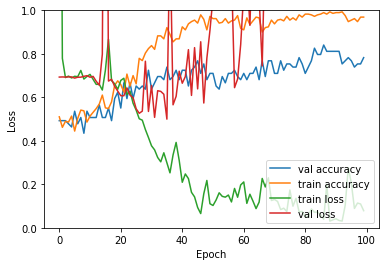

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
model.save('nn.h5')

In [ ]:
import tensorflow as tf
model2 = tf.keras.models.load_model('nn.h5')